# Python version of modal and average control

Downloaded the structural connectivity matrix from Dani's website. This file contains a bunch of dti adjacency matrices in a complex struct. So we load it first in octave 

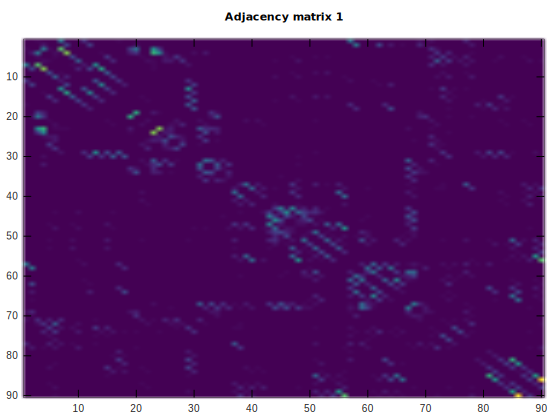

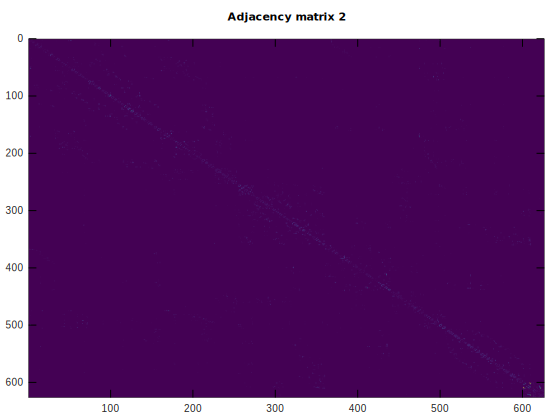

In [1]:
load learningdata.mat
examplemat1 = learningData.aa_004.dti_2.AAL90;
imagesc(examplemat1)
title("Adjacency matrix 1")

examplemat2 = learningData.cj_018.dti_1.AAL626;
figure
imagesc(examplemat2)
title("Adjacency matrix 2")



## Modal control

In [2]:
%%file modal_control.m
function [values] = modal_control(A)
% FUNCTION:
%         Returns values of MODAL CONTROLLABILITY for each node in a
%         network, given the adjacency matrix for that network. Modal
%         controllability indicates the ability of that node to steer the
%         system into difficult-to-reach states, given input at that node.
%
% INPUT:
%         A is the structural (NOT FUNCTIONAL) network adjacency matrix, 
% 	  such that the simple linear model of dynamics outlined in the 
%	  reference is an accurate estimate of brain state fluctuations. 
%	  Assumes all values in the matrix are positive, and that the 
%	  matrix is symmetric.
%
% OUTPUT:
%         Vector of modal controllability values for each node
%
% Bassett Lab, University of Pennsylvania, 2016. 
% Reference: Gu, Pasqualetti, Cieslak, Telesford, Yu, Kahn, Medaglia,
%            Vettel, Miller, Grafton & Bassett, Nature Communications
%            6:8414, 2015.

A = A./(1+svds(A,1));       % Matrix normalization 
[U, T] = schur(A,'real');   % Schur stability
eigVals = diag(T);
N = size(A,1);
phi = zeros(N,1);
for i = 1 : N
    phi(i) = (U(i,:).^2) * (1 - eigVals.^2);
end
values = phi;

Created file '/Users/mcieslak/projects/upenn/control/modal_control.m'.


In [3]:
modalresults1 = modal_control(examplemat1);
modalresults2 = modal_control(examplemat2);

## Average control

In [4]:
%%file ave_control.m
function [values] = ave_control(A)
% FUNCTION:
%         Returns values of AVERAGE CONTROLLABILITY for each node in a
%         network, given the adjacency matrix for that network. Average
%         controllability measures the ease by which input at that node can
%         steer the system into many easily-reachable states.
%
% INPUT:
%         A is the structural (NOT FUNCTIONAL) network adjacency matrix, 
% 	      such that the simple linear model of dynamics outlined in the 
%	      reference is an accurate estimate of brain state fluctuations. 
%	      Assumes all values in the matrix are positive, and that the 
%	      matrix is symmetric.
%
% OUTPUT:
%         Vector of average controllability values for each node
%
% Bassett Lab, University of Pennsylvania, 2016. 
% Reference: Gu, Pasqualetti, Cieslak, Telesford, Yu, Kahn, Medaglia,
%            Vettel, Miller, Grafton & Bassett, Nature Communications
%            6:8414, 2015.

A = A./(1+svds(A,1));     % Matrix normalization 
[U, T] = schur(A,'real'); % Schur stability
midMat = (U.^2)';
v = diag(T);
P = repmat(diag(1 - v*v'),1,size(A,1));
values = sum(midMat./P)';


Created file '/Users/mcieslak/projects/upenn/control/ave_control.m'.


In [5]:
averesults1 = ave_control(examplemat1);
averesults2 = ave_control(examplemat2);

# Walkthrough of what is happening in the functions

In [6]:
A = examplemat1;

% Modal control
modal_normed_norm_value = 1+svds(A,1);
modal_normed_A = A./ modal_normed_norm_value;       % Matrix normalization 
[modal_normed_U, modal_normed_T] = schur(modal_normed_A,'real');   % Schur stability
modal_normed_eigVals = diag(modal_normed_T);
modal_normed_N = size(modal_normed_A,1);
modal_normed_phi = zeros(modal_normed_N,1);
for i = 1 : modal_normed_N
    modal_normed_phi(i) = (modal_normed_U(i,:).^2) * (1 - modal_normed_eigVals.^2);
end
modal_normed_values = modal_normed_phi;


% Average control
ave_normed_norm_value = 1+svds(A,1);
ave_normed_A = A./ ave_normed_norm_value;     % Matrix normalization 
[ave_normed_U, ave_normed_T] = schur(ave_normed_A,'real'); % Schur stability
ave_normed_midMat = (ave_normed_U.^2)';
ave_normed_v = diag(ave_normed_T);
ave_normed_P = repmat(diag(1 - ave_normed_v*ave_normed_v'),1,size(ave_normed_A,1));
ave_normed_values = sum(ave_normed_midMat./ave_normed_P)';

save -mat-binary matlab_data.mat